/Users/g.siddharthareddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


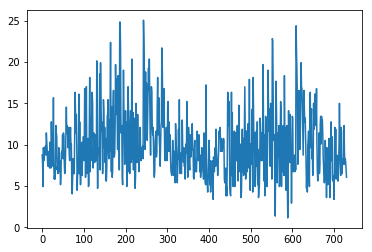

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 - 1s - loss: 0.0661 - mean_absolute_error: 0.2074
Epoch 2/25
 - 0s - loss: 0.0427 - mean_absolute_error: 0.1568
Epoch 3/25
 - 0s - loss: 0.0314 - mean_absolute_error: 0.1324
Epoch 4/25
 - 0s - loss: 0.0266 - mean_absolute_error: 0.1246
Epoch 5/25
 - 0s - loss: 0.0258 - mean_absolute_error: 0.1239
Epoch 6/25
 - 0s - loss: 0.0255 - mean_absolute_error: 0.1234
Epoch 7/25
 - 0s - loss: 0.0252 - mean_absolute_error: 0.1223
Epoch 8/25
 - 0s - loss: 0.0250 - mean_absolute_error: 0.1218
Epoch 9/25
 - 0s - loss: 0.0247 - mean_absolute_error: 0.1216
Epoch 10/25
 - 0s - loss: 0.0245 - mean_absolute_error: 0.1207
Epoch 11/25
 - 0s - loss: 0.0243 - mean_absolute_error: 0.1205
Epoch 12/25
 - 0s - loss: 0.0241 - mean_absolute_error: 0.1202
Epoch 13/25
 - 0s - loss: 0.0238 - mean_absolute_error: 0.1197
Epoch 14/25
 - 0s - loss: 0.0238 - mean_absolute_error: 0.1194
Epoch 1

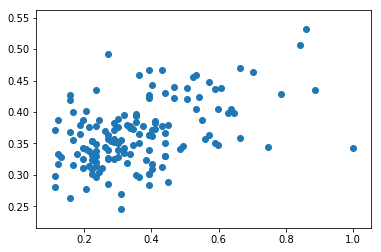

/Users/g.siddharthareddy/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1a245ecc88>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/g.siddharthareddy/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x1a246a0cc0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


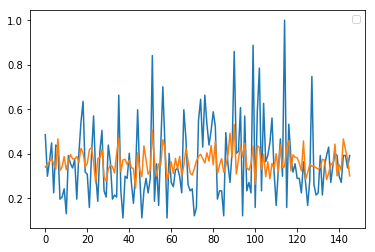

In [2]:
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import metrics
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
 
 
df = pd.read_csv('NYW.csv')
 
L = len(df)
 
Y = np.array([df.ix[:,3]])
 
plt.plot(Y[0,:])
plt.show(block=False)
 
X1 = Y[:,0:L-5]
X2 = Y[:,1:L-4]
X3 = Y[:,2:L-3]
 
X = np.concatenate([X1,X2,X3],axis=0)
X = np.transpose(X)
 
Y = np.transpose(Y[:,3:L-2])
 
sc= MinMaxScaler()
sc.fit(X)
X= sc.transform(X)
 
sc1 = MinMaxScaler()
sc1.fit(Y)
Y= sc1.transform(Y)
 
X = np.reshape(X,(X.shape[0],1,X.shape[1]))
 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
 
model= Sequential()
 
model.add(LSTM(10,activation='tanh',input_shape=(1,3),recurrent_activation='hard_sigmoid'))
 
model.add(Dense(1))
 
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=[metrics.mae])
 
model.fit(X_train,Y_train,epochs= 25,verbose=2)
 
predict= model.predict(X_test)
 
plt.figure(2)
plt.scatter(Y_test,predict)
plt.show(block=False)
 
plt.figure(3)
Real=plt.plot(Y_test)
Predict = plt.plot(predict)
plt.legend([Predict,Real],["Predicted Data","Real Data"])
plt.show()
